# 세계 행복지수 보고서 2021 분석

## 1-1. 문제 정의
* 문제 정의
  * 세계 행복지수에 관한 보고서를 통해 데이터 상관관계 등 새로운 사실을 밝혀내는 것이 목적이다.
  * 데이터는 Gallup World Poll의 것을 사용한다.
  * '긍정적인 척도', 또는 '긍정척도'는 국민 당 GDP의 로그 값, 사회적 지원, 건강한 삶 전망, 삶 결정권과 너그러운 정도를 가리킨다.
  * '부정적인 척도', 또는 '부정척도'는 부패 인식 정도를 가리킨다.
* 가설
  * 긍정적인 척도와 행복지수는 상관관계가 1에 가까울 것이다.
  * 부정적인 척도와 행복지수는 상관관계가 -1에 가까울 것이다.
  * 유럽과 북/남아메리카 지역에 위치한 국가들이 타 지역보다 행복지수가 높을 것이다.

## 1-2. 데이터 가져오기
* 데이터: [World Happiness Report 2021](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

In [1]:
# Jupyter에서 동작하지 않아서 따로 입력했습니다.
!kaggle datasets download -d ajaypalsinghlo/world-happiness-report-2021
!mkdir data
!tar -xvf world-happiness-report-2021.zip -C data

## 1-3. 데이터 로드하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


## 2-4. 데이터 살펴보기

In [5]:
df.shape

(149, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [8]:
df.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [9]:
# 중복되는 국가 이름이 있는지 확인
df['Country name'].duplicated().any()

False

In [10]:
# Ladder score in Dystopia 컬럼이 std가 0으로 나오기 때문에 확인
df['Ladder score in Dystopia'].value_counts()

2.43    149
Name: Ladder score in Dystopia, dtype: int64

In [11]:
# 삭제하기 전 컬럼명 확인
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [12]:
# 불필요한 컬럼 삭제하기
# Standard error of ladder score, upperwhisker, lowerwhisker, Explained by ~: 데이터로 직접 계산해 구해보는 것이 목적이기 때문에 삭제
# Ladder score in Dystopia: 전부 값이 2.43으로 동일함, 의미 없거나 잘못 기록된 지표라고 판단
# Dystopia + residual: 무슨 뜻인지 잘 몰라서 삭제

# 필요한 컬런
# Country name: 국가
# Regional indicator: 지역
# Ladder score: 행복지수
# Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity: 긍정적 척도
# Perceptions of corruption: 부정적 척도

df.drop([
    'Standard error of ladder score',
    'upperwhisker',
    'lowerwhisker',
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption',
    'Ladder score in Dystopia',
    'Dystopia + residual',
], axis=1, inplace=True)
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [13]:
# 컬럼명 축약
# 정보가 많이 생략되었지만 편의상 어쩔 수 없습니다.
# 기존 컬럼명은 cols_full에 저장
cols = [
    'country',
    'region',
    'score',
    'gdp',
    'social',
    'health',
    'freedom',
    'generosity',
    'corruption',
]
cols_full = df.columns.to_list()

# 인덱싱하기 편하게 만든 컬럼 리스트
# full: 전체 이름
# map: 축약된 이름으로 전체 이름을 찾을 때 활용
pos_cols = ['gdp', 'social', 'health', 'freedom', 'generosity']
pos_cols_full = [cols_full[cols.index(cname)] for cname in pos_cols]
pos_cols_map = dict(zip(pos_cols, pos_cols_full))
neg_cols = ['corruption']
neg_cols_full = [cols_full[cols.index(cname)] for cname in neg_cols]
neg_cols_map = dict(zip(neg_cols, neg_cols_full))

# 컬럼명 바꾸기
df.columns = cols
df.head()

,country,region,score,gdp,social,health,freedom,generosity,corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [14]:
# 행복지수를 기준으로 내림차순으로 정렬하기
df = df.sort_values(by='score', ascending=False)
df.head()

,country,region,score,gdp,social,health,freedom,generosity,corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


## 1-5. EDA (탐색적 데이터 분석)

### 0. 사전 설정

In [15]:
# plt - 기호 관련 경고 해결
plt.rcParams['axes.unicode_minus'] = False

### 1. 긍정적인 척도 보기

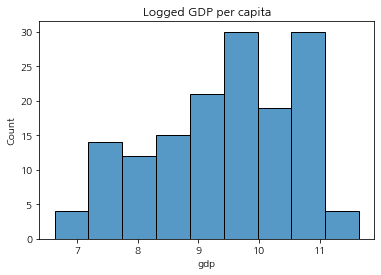

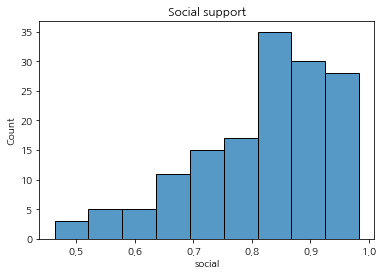

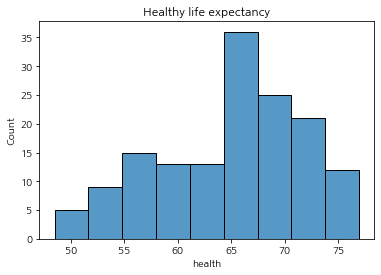

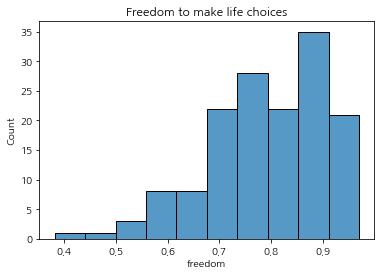

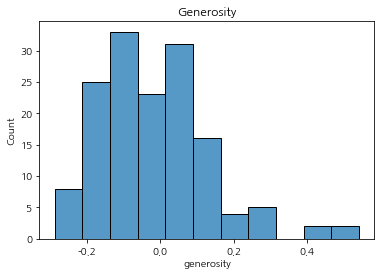

In [16]:
# 긍정적인 척도 통계
for i, (name, full_name) in enumerate(zip(pos_cols, pos_cols_full)):
    plt.title(full_name)
    sns.histplot(df[name])
    plt.show()

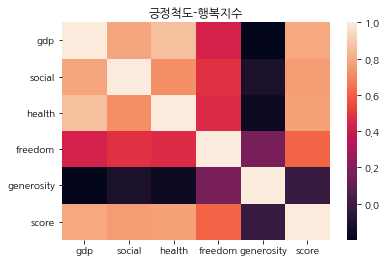

In [17]:
# 긍정적인 척도와 행복지수의 상관관계
plt.title('긍정척도-행복지수')
sns.heatmap(df[pos_cols+['score']].corr())
plt.show()

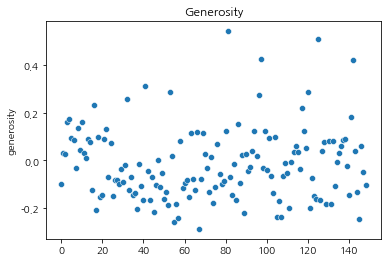

In [18]:
# Generosity
# 비선형적
plt.title(pos_cols_map['generosity'])
sns.scatterplot(data=df['generosity'])
plt.show()

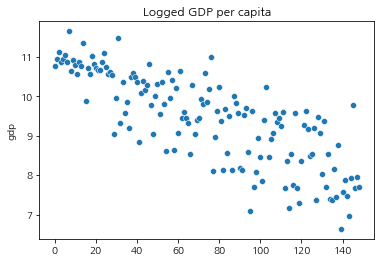

In [19]:
# 비교 예시: Logged GDP per capita
# 선형적
plt.title(pos_cols_map['gdp'])
sns.scatterplot(data=df['gdp'])
plt.show()

Generosity를 제외한 긍정적인 척도와 행복지수의 상관관계는 1에 가깝다는 가설은 성립한다. 그러나 Generosity 컬럼은 선형적인 관계와는 멀다.

### 2. 부정적인 척도 보기

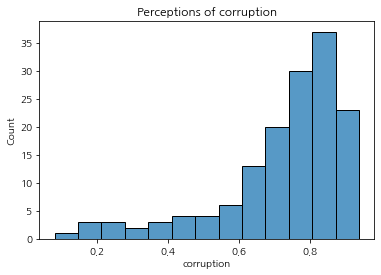

In [20]:
# 부정적인 척도 통계
for i, (name, full_name) in enumerate(zip(neg_cols, neg_cols_full)):
    plt.title(full_name)
    sns.histplot(df[name])
    plt.show()

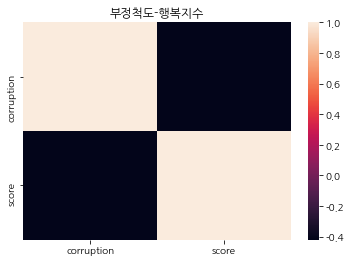

In [21]:
# 부정적인 척도와 행복지수의 상관관계
plt.title('부정척도-행복지수')
sns.heatmap(df[neg_cols+['score']].corr())
plt.show()

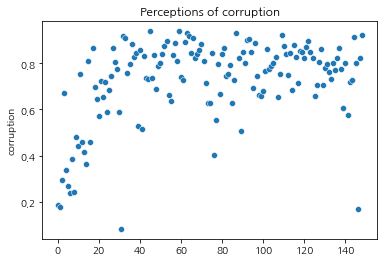

In [22]:
plt.title(neg_cols_map['corruption'])
sns.scatterplot(data=df['corruption'])
plt.show()

부정적인 척도는 상관관계가 음수였으나, 예상보다 -1에서 더 멀었다. 따라서 부정적인 척도와 행복지수는 상관관계가 -1에 가까울 것이라는 가설은 사실과 거리가 있다.

### 3. 지역별 보기

In [23]:
df_region = df.groupby('region')['score'].mean().reset_index().sort_values(by='score', ascending=False)
df_region

,region,score
5,North America and ANZ,7.128500
9,Western Europe,6.914905
0,Central and Eastern Europe,5.984765
3,Latin America and Caribbean,5.908050
2,East Asia,5.810333
1,Commonwealth of Independent States,5.467000
7,Southeast Asia,5.407556
4,Middle East and North Africa,5.219765
8,Sub-Saharan Africa,4.494472
6,South Asia,4.441857


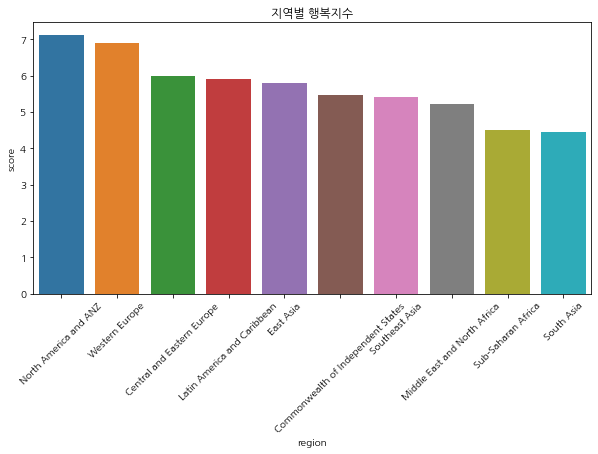

In [24]:
plt.figure(figsize=(10, 5))
plt.title('지역별 행복지수')
plt.xticks(rotation=45)
sns.barplot(x='region', y='score', data=df_region)
plt.show()

북/남아메리카, 유럽 지역이 행복지수가 상대적으로 높았다. 반면에 아프리카, 남아시아 지역은 행복지수가 상대적으로 낮았다. 따라서 유럽과 북/남아메리카 지역에 위치한 국가들이 타 지역보다 행복지수가 높다는 가설은 성립한다.